In [1]:
%matplotlib inline

# Start importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model, Sequential 
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU
from tensorflow.keras import optimizers     
from tensorflow.keras import regularizers           
from tensorflow.keras.utils import to_categorical
from timeit import default_timer as timer
rnn = SimpleRNN





In [2]:
Apple_df = pd.read_csv("AAPL_reversed.csv")
Apple_df.head()
len(Apple_df)

9715

In [3]:
def format_data(data, length_of_sequence = 2):  
    """
        Inputs:
            data(a numpy array): the data that will be the inputs to the recurrent neural
                network
            length_of_sequence (an int): the number of elements in one iteration of the
                sequence patter.  For a function approximator use length_of_sequence = 2.
        Returns:
            rnn_input (a 3D numpy array): the input data for the recurrent neural network.  Its
                dimensions are length of data - length of sequence, length of sequence, 
                dimnsion of data
            rnn_output (a numpy array): the training data for the neural network
        Formats data to be used in a recurrent neural network.
    """

    X, Y = [], []
    for i in range(len(data)-length_of_sequence):
        # Get the next length_of_sequence elements
        a = data[i:i+length_of_sequence]
        # Get the element that immediately follows that
        b = data[i+length_of_sequence]
        # Reshape so that each data point is contained in its own array
        a = np.reshape (a, (len(a), 1))
        X.append(a)
        Y.append(b)
    rnn_input = np.array(X)
    rnn_output = np.array(Y)

    return rnn_input, rnn_output



In [4]:
def rnn(length_of_sequences, batch_size = None, stateful = False):
    """
        Inputs:
            length_of_sequences (an int): the number of y values in "x data".  This is determined
                when the data is formatted
            batch_size (an int): Default value is None.  See Keras documentation of SimpleRNN.
            stateful (a boolean): Default value is False.  See Keras documentation of SimpleRNN.
        Returns:
            model (a Keras model): The recurrent neural network that is built and compiled by this
                method
        Builds and compiles a recurrent neural network with one hidden layer and returns the model.
    """
    # Number of neurons in the input and output layers
    in_out_neurons = 1
    # Number of neurons in the hidden layer
    hidden_neurons = 200
    # Define the input layer
    inp = Input(batch_shape=(batch_size, 
                length_of_sequences, 
                in_out_neurons))  
    # Define the hidden layer as a simple RNN layer with a set number of neurons and add it to 
    # the network immediately after the input layer
    rnn = SimpleRNN(hidden_neurons, 
                    return_sequences=False,
                    stateful = stateful,
                    name="RNN")(inp)
    # Define the output layer as a dense neural network layer (standard neural network layer)
    #and add it to the network immediately after the hidden layer.
    dens = Dense(in_out_neurons,name="dense")(rnn)
    # Create the machine learning model starting with the input layer and ending with the 
    # output layer
    model = Model(inputs=[inp],outputs=[dens])
    # Compile the machine learning model using the mean squared error function as the loss 
    # function and an Adams optimizer.
    model.compile(loss="mean_squared_error", optimizer="adam")  
    return model

** 12
** 11
Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 2, 1)]            0         
_________________________________________________________________
RNN (SimpleRNN)              (None, 200)               40400     
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 40,601
Trainable params: 40,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
1/1 [==============================] - 1s 1s/step - loss: 0.0075 - val_loss: 8.2615e-04
Epoch 2/40
1/1 [==============================] - 0s 184ms/step - loss: 9.2139e-04 - val_loss: 4.7153e-04
Epoch 3/40
1/1 [==============================] - 0s 249ms/step - loss: 4.2477e-04 - val_loss: 0.0026
Epoch 4/40
1/1 [==============================] - 0s 243ms/step -

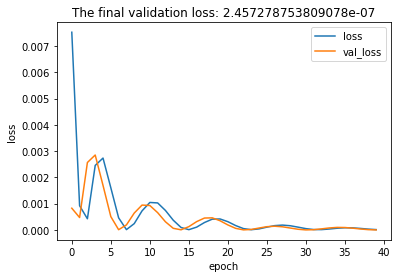

MSE:  0.0


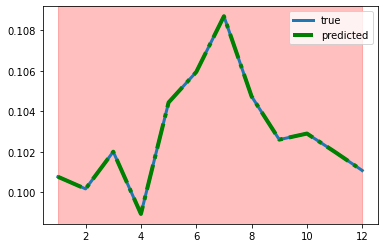

Time:  10.605486250991817
** 12
** 11
Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 2, 1)]            0         
_________________________________________________________________
RNN (SimpleRNN)              (None, 200)               40400     
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 40,601
Trainable params: 40,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
1/1 [==============================] - 1s 1s/step - loss: 0.0126 - val_loss: 0.0026
Epoch 2/40
1/1 [==============================] - 0s 444ms/step - loss: 0.0029 - val_loss: 7.7575e-06
Epoch 3/40
1/1 [==============================] - 1s 551ms/step - loss: 8.8357e-06 - val_loss: 0.0020
Epoch 4/40
1/1 [==============================]

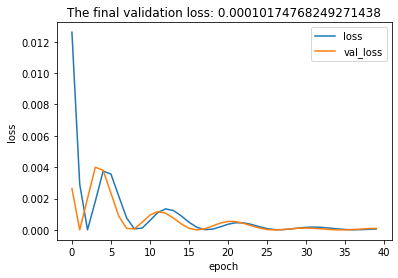

MSE:  0.0


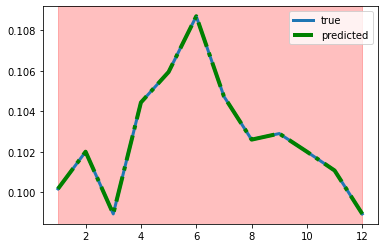

Time:  12.451368574998924
** 12
** 11
Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 2, 1)]            0         
_________________________________________________________________
RNN (SimpleRNN)              (None, 200)               40400     
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 40,601
Trainable params: 40,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
1/1 [==============================] - 1s 1s/step - loss: 0.0059 - val_loss: 9.2051e-05
Epoch 2/40
1/1 [==============================] - 0s 187ms/step - loss: 1.9247e-04 - val_loss: 0.0017
Epoch 3/40
1/1 [==============================] - 0s 378ms/step - loss: 0.0015 - val_loss: 0.0031
Epoch 4/40
1/1 [==============================]

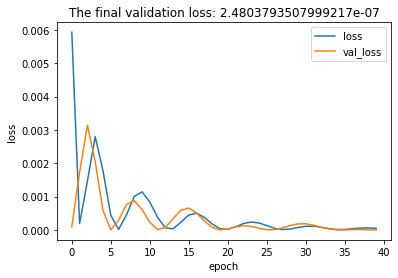

MSE:  0.0


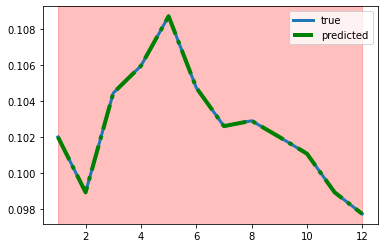

Time:  10.902748337000958
** 12
** 11
Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 2, 1)]            0         
_________________________________________________________________
RNN (SimpleRNN)              (None, 200)               40400     
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 40,601
Trainable params: 40,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
1/1 [==============================] - 1s 1s/step - loss: 0.0055 - val_loss: 6.7374e-05
Epoch 2/40
1/1 [==============================] - 0s 136ms/step - loss: 1.4923e-04 - val_loss: 0.0016
Epoch 3/40
1/1 [==============================] - 0s 319ms/step - loss: 0.0014 - val_loss: 0.0029
Epoch 4/40
1/1 [==============================]

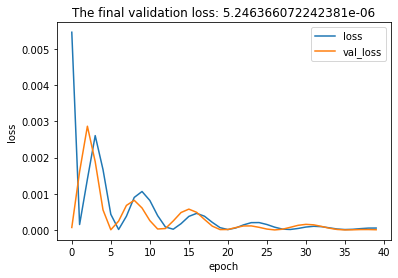

MSE:  0.0


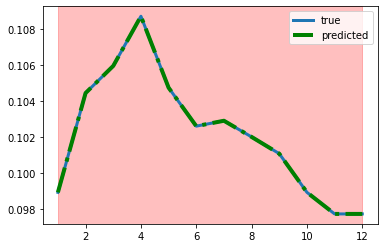

Time:  10.190346440998837
** 12
** 11
Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 2, 1)]            0         
_________________________________________________________________
RNN (SimpleRNN)              (None, 200)               40400     
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 40,601
Trainable params: 40,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
1/1 [==============================] - 2s 2s/step - loss: 0.0150 - val_loss: 0.0031
Epoch 2/40
1/1 [==============================] - 0s 200ms/step - loss: 0.0036 - val_loss: 4.4788e-06
Epoch 3/40
1/1 [==============================] - 0s 295ms/step - loss: 8.6487e-06 - val_loss: 0.0023
Epoch 4/40
1/1 [==============================]

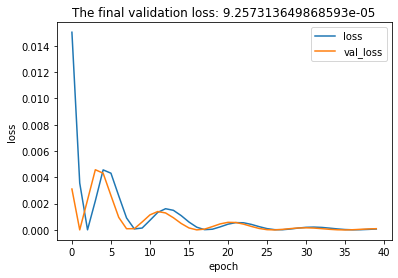

MSE:  0.0


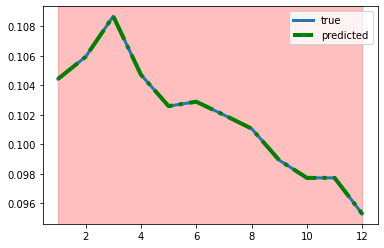

Time:  10.844995605002623
** 12
** 11
Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 2, 1)]            0         
_________________________________________________________________
RNN (SimpleRNN)              (None, 200)               40400     
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 40,601
Trainable params: 40,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
1/1 [==============================] - 1s 1s/step - loss: 0.0074 - val_loss: 6.3158e-04
Epoch 2/40
1/1 [==============================] - 0s 70ms/step - loss: 7.9919e-04 - val_loss: 5.8027e-04
Epoch 3/40
1/1 [==============================] - 0s 111ms/step - loss: 5.1245e-04 - val_loss: 0.0026
Epoch 4/40
1/1 [========================

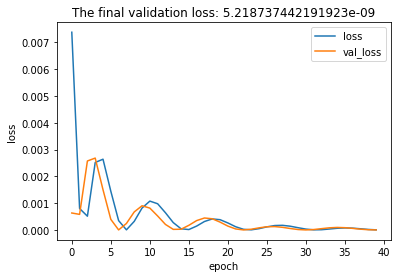

MSE:  0.0


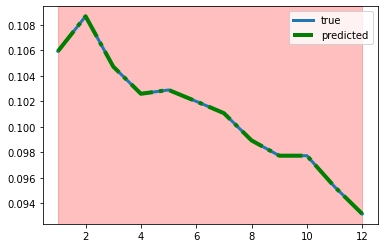

Time:  8.406748916997458


In [8]:
# y_tot = Apple_df.Close.values[:13]
# X_tot = np.arange(1,y_tot.shape[0]+1)
correct_predicted_directions = [] 
# This is the number of points that will be used in as the training data
dim=12 #dim is the number of training points + one extra points to predict 
datatype='VaryDimension'
    #:20 means up ot 20
for index in range(Apple_df.shape[0]):
    start = index
    stop = index + dim  # window size  +1 
    y_tot = Apple_df.Close.values[start:stop]
    print('**',len(y_tot))
    X_tot = np.arange(1,y_tot.shape[0]+1)
    # put code to train model and show results here
    
    def test_rnn (x1, y_test, plot_min, plot_max):
        """
            Inputs:
                x1 (a list or numpy array): The complete x component of the data set
                y_test (a list or numpy array): The complete y component of the data set
                plot_min (an int or float): the smallest x value used in the training data
                plot_max (an int or float): the largest x valye used in the training data
            Returns:
                None.
            Uses a trained recurrent neural network model to predict future points in the 
            series.  Computes the MSE of the predicted data set from the true data set, saves
            the predicted data set to a csv file, and plots the predicted and true data sets w
            while also displaying the data range used for training.
        """
        # Add the training data as the first dim points in the predicted data array as these
        # are known values.
        y_pred = y_test[:dim].tolist()
        # Generate the first input to the trained recurrent neural network using the last two 
        # points of the training data.  Based on how the network was trained this means that it
        # will predict the first point in the data set after the training data.  All of the 
        # brackets are necessary for Tensorflow.
        next_input = np.array([[[y_test[dim-2]], [y_test[dim-1]]]])
        # Save the very last point in the training data set.  This will be used later.
        last = [y_test[dim-1]]

        # Iterate until the complete data set is created.
        for i in range (dim, len(y_test)):
            # Predict the next point in the data set using the previous two points.
            next = model.predict(next_input)
            # Append just the number of the predicted data set
            y_pred.append(next[0][0])
            # Create the input that will be used to predict the next data point in the data set.
            next_input = np.array([[last, next[0]]], dtype=np.float64)
            last = next

        # Print the mean squared error between the known data set and the predicted data set.
        print('MSE: ', np.square(np.subtract(y_test, y_pred)).mean())
        # Save the predicted data set as a csv file for later use
        name = datatype + 'Predicted'+str(dim)+'.csv'
        np.savetxt(name, y_pred, delimiter=',')
        # Plot the known data set and the predicted data set.  The red box represents the region that was used
        # for the training data.
        fig, ax = plt.subplots()
        ax.plot(x1, y_test, label="true", linewidth=3)
        ax.plot(x1, y_pred, 'g-.',label="predicted", linewidth=4)
        ax.legend()
        # Created a red region to represent the points used in the training data.
        ax.axvspan(plot_min, plot_max, alpha=0.25, color='red')
        plt.show()

    # Check to make sure the data set is complete
    assert len(X_tot) == len(y_tot)


    # Separate the training data from the whole data set
    X_train = X_tot[:dim-1] #-1 means it uses all data
    y_train = y_tot[:dim-1]
    print('**',len(y_train))


    # Generate the training data for the RNN, using a sequence of 2
    rnn_input, rnn_training = format_data(y_train, 2)


    # Create a recurrent neural network in Keras and produce a summary of the 
    # machine learning model
    model = rnn(length_of_sequences = rnn_input.shape[1])
    model.summary()

    # Start the timer.  Want to time training+testing
    start = timer()
    # Fit the model using the training data genenerated above using 150 training iterations and a 5%
    # validation split.  Setting verbose to True prints information about each training iteration.
    hist = model.fit(rnn_input, rnn_training, batch_size=None, epochs=40, 
                     verbose=True,validation_split=0.05)

    for label in ["loss","val_loss"]:
        plt.plot(hist.history[label],label=label)

    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.title("The final validation loss: {}".format(hist.history["val_loss"][-1]))
    plt.legend()
    plt.show()

    # Use the trained neural network to predict more points of the data set
    test_rnn(X_tot, y_tot, X_tot[0], X_tot[dim-1])
    # Stop the timer and calculate the total time needed.
    end = timer()
    print('Time: ', end-start)

    if index == 5:
        break # stops the loop

    
    #:20 means up ot 20

In [ ]:
def rnn_2layers(length_of_sequences, batch_size = None, stateful = False):
    """
        Inputs:
            length_of_sequences (an int): the number of y values in "x data".  This is determined
                when the data is formatted
            batch_size (an int): Default value is None.  See Keras documentation of SimpleRNN.
            stateful (a boolean): Default value is False.  See Keras documentation of SimpleRNN.
        Returns:
            model (a Keras model): The recurrent neural network that is built and compiled by this
                method
        Builds and compiles a recurrent neural network with two hidden layers and returns the model.
    """
    # Number of neurons in the input and output layers
    in_out_neurons = 1
    # Number of neurons in the hidden layer, increased from the first network
    hidden_neurons = 500
    # Define the input layer
    inp = Input(batch_shape=(batch_size, 
                length_of_sequences, 
                in_out_neurons))  
    # Create two hidden layers instead of one hidden layer.  Explicitly set the activation
    # function to be the sigmoid function (the default value is hyperbolic tangent)
    rnn1 = SimpleRNN(hidden_neurons, 
                    return_sequences=True,  # This needs to be True if another hidden layer is to follow
                    stateful = stateful, activation = 'sigmoid',
                    name="RNN1")(inp)
    rnn2 = SimpleRNN(hidden_neurons, 
                    return_sequences=False, activation = 'sigmoid',
                    stateful = stateful,
                    name="RNN2")(rnn1)
    # Define the output layer as a dense neural network layer (standard neural network layer)
    #and add it to the network immediately after the hidden layer.
    dens = Dense(in_out_neurons,name="dense")(rnn2)
    # Create the machine learning model starting with the input layer and ending with the 
    # output layer
    model = Model(inputs=[inp],outputs=[dens])
    # Compile the machine learning model using the mean squared error function as the loss 
    # function and an Adams optimizer.
    model.compile(loss="mean_squared_error", optimizer="adam")  
    return model

# Check to make sure the data set is complete
assert len(X_tot) == len(y_tot)

# This is the number of points that will be used in as the training data
dim=12

# Separate the training data from the whole data set
X_train = X_tot[:dim]
y_train = y_tot[:dim]


# Generate the training data for the RNN, using a sequence of 2
rnn_input, rnn_training = format_data(y_train, 2)


# Create a recurrent neural network in Keras and produce a summary of the 
# machine learning model
model = rnn_2layers(length_of_sequences = 2)
model.summary()

# Start the timer.  Want to time training+testing
start = timer()
# Fit the model using the training data genenerated above using 150 training iterations and a 5%
# validation split.  Setting verbose to True prints information about each training iteration.
hist = model.fit(rnn_input, rnn_training, batch_size=None, epochs=150, 
                 verbose=True,validation_split=0.05)


# This section plots the training loss and the validation loss as a function of training iteration.
# This is not required for analyzing the couple cluster data but can help determine if the network is
# being overtrained.
for label in ["loss","val_loss"]:
    plt.plot(hist.history[label],label=label)

plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("The final validation loss: {}".format(hist.history["val_loss"][-1]))
plt.legend()
plt.show()

# Use the trained neural network to predict more points of the data set
test_rnn(X_tot, y_tot, X_tot[0], X_tot[dim-1])
# Stop the timer and calculate the total time needed.
end = timer()
print('Time: ', end-start)